# Using statsmodels to make Hypothesis Test

Population: parents with teenagers

Parameter of interest: p

Null hypo: p=0.48

Alternative hypo: p>0.48

Test to see if the date of a study saying that 48% of the parents with teenagers children thinks that social media is causing stress (fake data)

In [62]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
n = 4500
pnull = 0.48
phat = 0.65

sm.stats.proportions_ztest(phat*n, n, pnull, alternative='larger') #testing new p value

(23.90916877786327, 1.2294951052777303e-126)

Another test: is the average reading time of students higher thant 212 words per minute?

Population: adults

Parameter of interest: u

Null hypothesis: u = 212

Alternative hypothesis: u>212

Confidence level: a = 0.05

In [4]:
sdata = np.random.randint(200,259,89)

sm.stats.ztest(sdata, value=80, alternative='larger')

(81.95715050493875, 0.0)

The p-value is 0, lower than our confidence level. So, we can reject the null hypothesis: average adults' reading time isn't 212 

## T - test
Good to verify huge differences in mean. Exemple: teste whether the average height is 175cm or not: 

Population: students in a class

Parameter of interest: u, the population of a class

Null hypothesis: The average height is u = 175 cm 

Alternative hypothesis: u>175

Confidence level: a = 0.05

In [39]:
height = np.array([172, 184, 174, 168, 174, 183, 170, 173, 184,
179, 171, 173, 181, 183, 172, 178, 160, 182, 181, 172, 175, 170,
168, 178, 170, 181, 180, 173, 183, 180, 170, 181, 171, 173, 171,
182, 180, 170, 172, 175, 178, 174, 184, 177, 181, 180, 178, 179,
175, 170, 182, 176, 183, 179, 162])

In [40]:
from scipy.stats import ttest_1samp

In [41]:
height_average = np.mean(height)
print("Average height is = {0:.3f}".format(height_average))

Average height is = 175.909


In [42]:
tset,pval = ttest_1samp(height, 175)

print('p-value = {}'.format(pval))

if pval<0.05:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

p-value = 0.23673023570890003
We accept the null hypothesis


Test if Yeezy Sneakers average profit is $190:

Population: yeezy sneakers

Parameter of interest: u, the sample of first sale of a yeezy in a day

Null hypothesis: The average profit is u = $190 

Alternative hypothesis: u>190

Confidence level: a = 0.05


In [46]:
df = pd.read_csv('StockX-Data-Contest-2019-3.csv')

sp = [float(x[1:].replace(',', '')) for x in list(df['Sale Price'])]
df['Sale Price'] = sp
rp = [float(x[1:].replace(',', '')) for x in list(df['Retail Price'])]
df['Retail Price'] = rp

yzy = df[df['Brand'] == ' Yeezy']

yzy_b = yzy[yzy['Sneaker Name'] == 'Adidas-Yeezy-Boost-350-V2-Beluga-2pt0']
yzy_b.drop_duplicates(subset=['Order Date'], ignore_index=True, inplace=True)

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [47]:
yzy_b['profit'] = yzy_b['Sale Price'] - yzy_b['Retail Price']

/home/sergio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
tset,pval = ttest_1samp(yzy_b.profit.values, 190)

print('p-value = {}'.format(pval))

if pval<0.05:
    print('We reject the null hypothesis. The profit average isnt 190.')
else:
    print('We accept the null hypothesis. The profit average is 190')

p-value = 0.0013705792462635623
We reject the null hypothesis. The profit average isnt 190.


# Creating Models

## Simple linear regression
Y = a + bX + u

Y is the dependent variable, the target, X is the independent variable, a simple feature. a is the intercept and b the slope. The key to find a and b is to minimize u, which is the error function (aka cost function or loss function), and is calculated by the sum of the square of the difference from the distance between the line and a data point. 

## Multiple linear regression
Y = a + b1X1 + b2X2 + b3X3 + ... + btXt + u

In this case, Y depends on more than one variable.

## Nonlinear regression
Y = f(X, $\beta$) + $\epsilon$

Y is the dependent variable, X is a vector of predictors that have a relationship with the target, $\beta$ is the parameters and $\epsilon$ is an error associated. Nonlinear models can fit an enormous variaty of curves, using exponential, logarithmic and trigonometrical functions. The ideal is to reduce the maximum the OLS (sum of the sqaure of the difference from the distance between the line and data points).

In [66]:
df = pd.read_csv('Fish.csv')

In [68]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [72]:
df.shape

(159, 7)

In [73]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [74]:
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

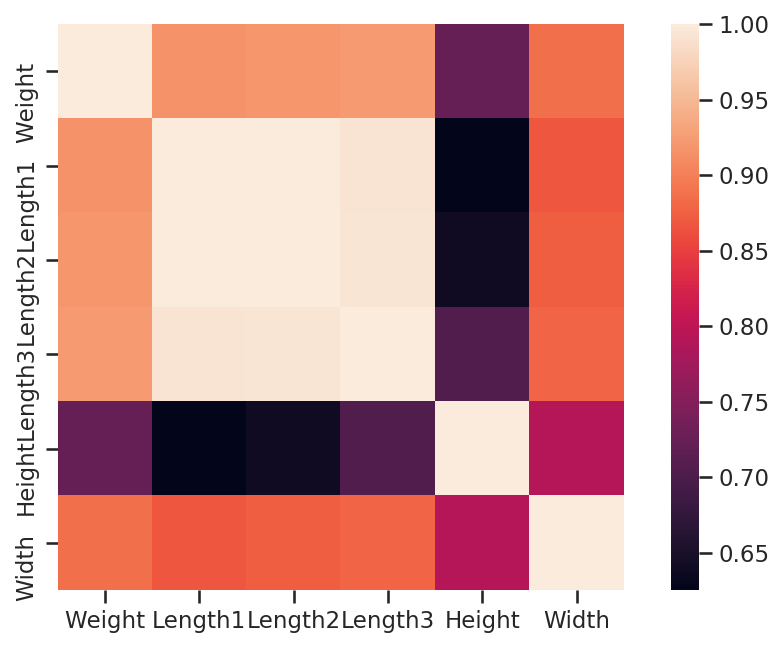

In [75]:
sns.heatmap(df.corr(), square=True)

In [79]:
from scipy import stats
corr = stats.pearsonr(df['Width'], df['Height'])
corr

(0.7928810172871048, 1.3475490404820328e-35)

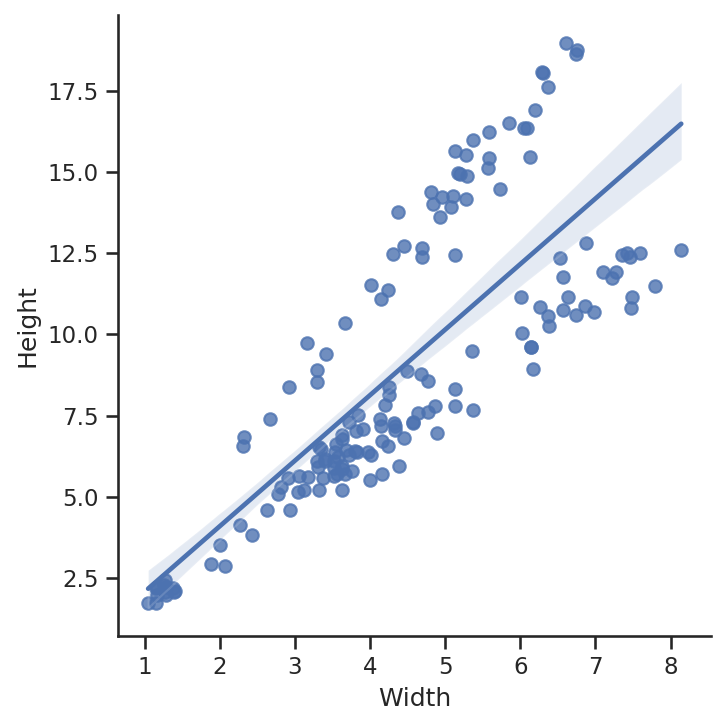

In [81]:
sns.lmplot(x = 'Width', y = 'Height', data = df)

In [82]:
X = df[['Width']]
y = df[['Height']]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
regressor.score(X_test, y_test)

0.6325958598929257

In [88]:
y_pred=regressor.predict(X_test)

# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,18.9570,13.270489
1,6.1146,6.831142
2,14.9544,10.483161
3,5.8560,7.472800
4,5.0820,5.814649
5,14.4738,11.566797
6,6.6339,7.324500
7,14.3714,9.789929
8,6.4752,6.942659
9,6.3750,7.863983


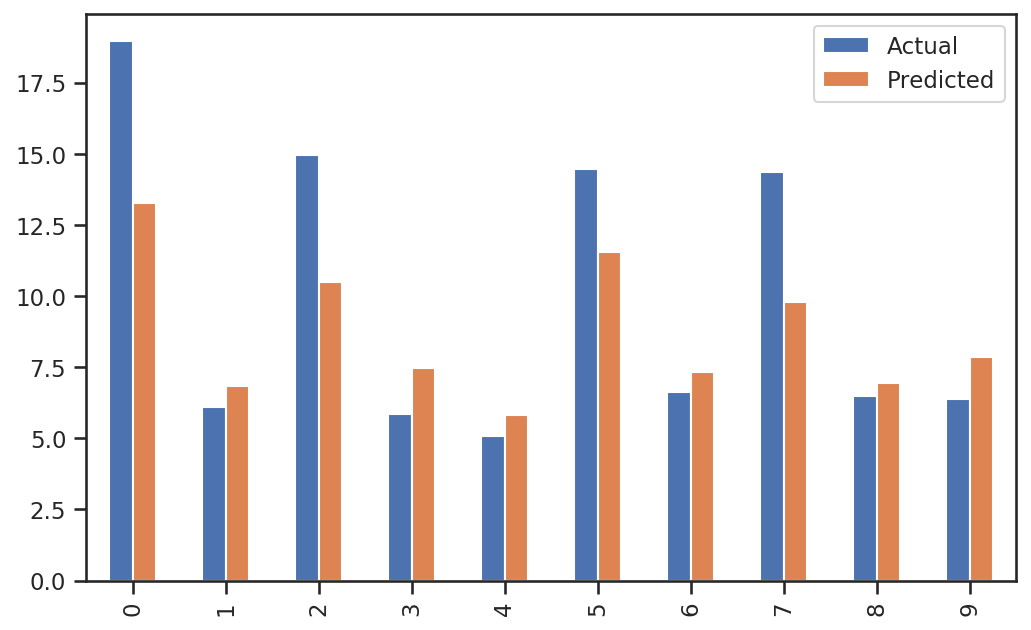

In [90]:
evaluate.head(10).plot(kind = 'bar')

## Accuracy

In [91]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [93]:
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.6325958598929257
MAE score: 2.221103929125009
MSE score: 6.974059165585563


Mean Squared Error (MSE) -> our actual value is x, and our predicted value is x'. The error is given by $\epsilon$ = x - x', and, then, the Squared Error is given by  the $\Sigma$  $ \epsilon^2$, for each $\epsilon$. The MSE will be SE/n. RMSE, it's the square root of MSE and it's also used. And the rMSE, it's MSE divided by variance, also used too.

Mean Absolut Error (MAE) -> first, we find the Absolute Error which is given by $\Sigma$  |$\epsilon$|, then, the MAE, which will be AE/n

## Multi linear model

In [104]:
X = df[['Weight', 'Length1', 'Length2', 'Length3', 'Width']]
y = df[['Height']]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [106]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
regressor.score(X_test, y_test)

0.9535279286838557

In [108]:
y_pred=regressor.predict(X_test)

# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,5.1992,5.080566
1,2.4300,2.104282
2,5.5680,5.445535
3,8.3804,9.290488
4,5.2185,6.273331
5,18.9570,18.082185
6,1.7284,1.880342
7,7.0866,7.318013
8,6.7334,6.948426
9,10.6863,11.844023


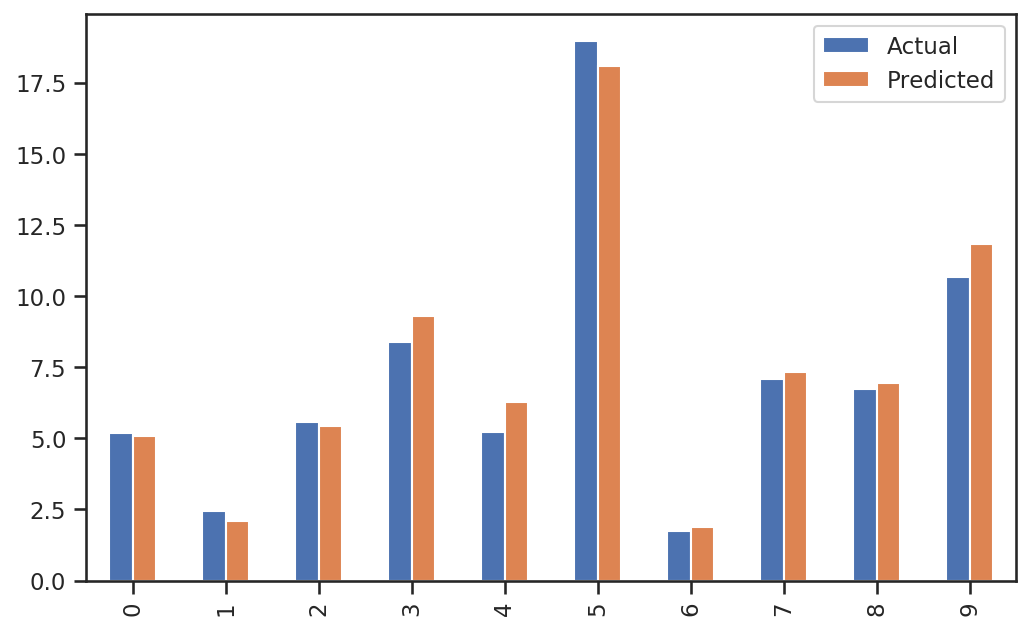

In [109]:
evaluate.head(10).plot(kind = 'bar')